In [1]:
#!pip install getFamaFrenchFactors

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
import statsmodels.api as sm
import getFamaFrenchFactors as ff
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.stats.diagnostic import het_white


In [3]:
start = datetime.date(2016, 1, 29)
end = datetime.date(2021, 1, 2)
ticker=['AAPL','MSFT']

In [4]:
data=web.get_data_yahoo(ticker,start,end)['Adj Close']
data.head()

Symbols,AAPL,MSFT
Date,,
2016-01-29,22.278250,49.390690
2016-02-01,22.069975,49.049999
2016-02-02,21.623676,47.516911
2016-02-03,22.051668,46.763805
2016-02-04,22.228851,46.620361


In [5]:
# Convert to Monthly
prices=data.resample('1M').last()
prices.shape

(60, 2)

In [6]:
## Monthly Returns
returns = prices.pct_change()
returns=returns.dropna()
returns.head()

Symbols,AAPL,MSFT
Date,,
2016-02-29,-0.001288,-0.069789
2016-03-31,0.127210,0.085495
2016-04-30,-0.139921,-0.097049
2016-05-31,0.071773,0.070197
2016-06-30,-0.042660,-0.034528


In [7]:
# Determine weights
initialAAPL= prices.AAPL[0] * 100
initialMSFT = prices.MSFT[0] * 5

initialInvestment = initialAAPL + initialMSFT
initialInvestment

2474.778423309326

In [8]:
weightAAPL = initialAAPL / (initialMSFT + initialAAPL)
weightMSFT= 1 - weightAAPL
print(
    "This would make the weights %.3f and %.3f for AAPL and MSFT respectively"
    % (weightAAPL, weightMSFT)
)

This would make the weights 0.900 and 0.100 for AAPL and MSFT respectively


In [9]:
returns["Portfolio"] = (returns.AAPL * weightAAPL) + (returns.MSFT * weightMSFT)
returns = returns + 1
returns


Symbols,AAPL,MSFT,Portfolio
Date,,,
2016-02-29,0.998712,0.930211,0.991877
2016-03-31,1.127210,1.085495,1.123048
2016-04-30,0.860079,0.902951,0.864357
2016-05-31,1.071773,1.070197,1.071615
2016-06-30,0.957340,0.965472,0.958152
2016-07-31,1.090063,1.107680,1.091821
2016-08-31,1.023652,1.020080,1.023295
2016-09-30,1.065504,1.002437,1.059211
2016-10-31,1.004334,1.040278,1.007921


In [10]:
Average_portfolio_returns=returns['Portfolio'].mean()
Average_portfolio_returns

1.0334309560507373

In [11]:
portValues = returns.cumprod()
portValues["Date"] = portValues.index

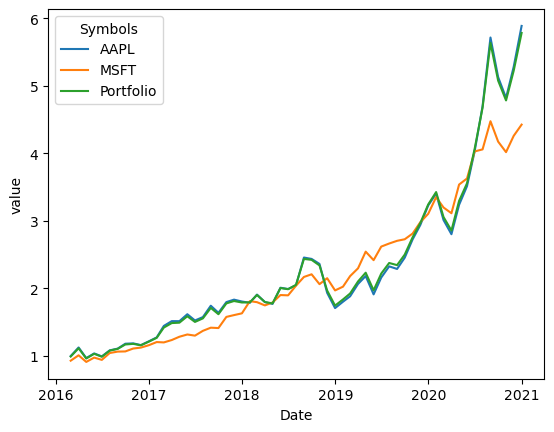

In [12]:
sns.lineplot(x="Date", y="value", hue="Symbols", data=portValues.melt(id_vars=["Date"]));

In [13]:

## Get FamaFrench 3 Factors
ff_monthly=pd.DataFrame(ff.famaFrench3Factor(frequency='m'))
ff_monthly.rename(columns={'date_ff_factors':'Date'},inplace=True)
ff_monthly.set_index('Date',inplace=True)
ff_monthly

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-31,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2022-06-30,-0.0843,0.0209,-0.0597,0.0006
2022-07-31,0.0957,0.0281,-0.0410,0.0008
2022-08-31,-0.0377,0.0139,0.0031,0.0019


In [14]:
# Lets see average monthly premium
market_premium=ff_monthly['Mkt-RF'].mean()
size_premium=ff_monthly['SMB'].mean()
value_premium=ff_monthly['HML'].mean()
print(market_premium,size_premium,value_premium)

0.006704671280276817 0.0019310553633217996 0.0035903979238754327


Text(0.5, 1.0, 'Size Factor over Time')

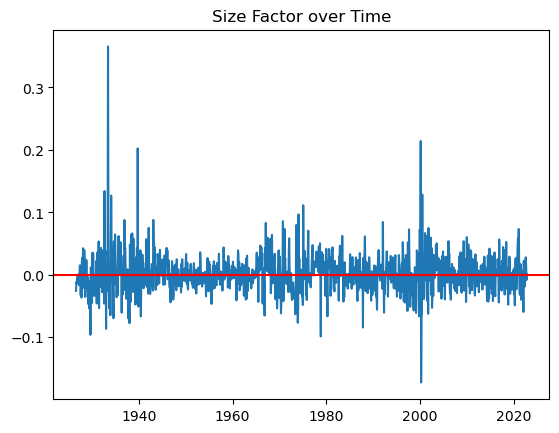

In [15]:
plt.plot(ff_monthly['SMB'])
plt.axhline(0,color='red')
plt.title('Size Factor over Time')

Text(0.5, 1.0, 'Value Factor over Time')

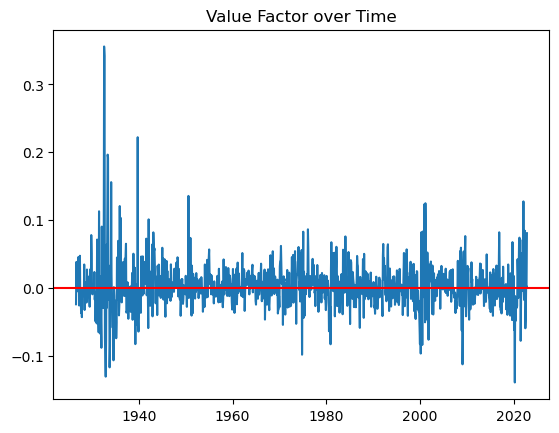

In [16]:
plt.plot(ff_monthly['HML'])
plt.axhline(0,color='red')
plt.title('Value Factor over Time')

Text(0.5, 1.0, 'Market Factor over Time')

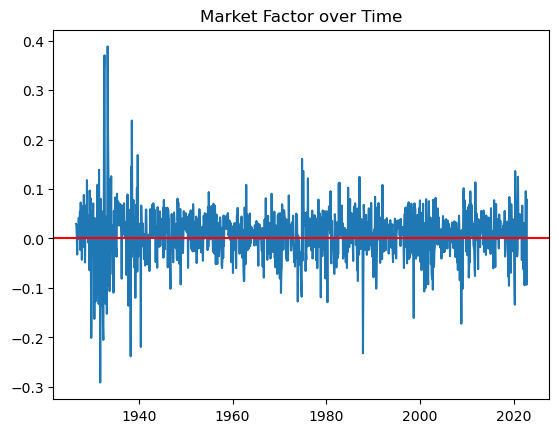

In [17]:
plt.plot(ff_monthly['Mkt-RF'])
plt.axhline(0,color='red')
plt.title('Market Factor over Time')

In [18]:
data=ff_monthly.merge(returns,on='Date')
data

,Mkt-RF,SMB,HML,RF,AAPL,MSFT,Portfolio
Date,,,,,,,
2016-02-29,-0.0007,0.0071,-0.0057,0.0002,0.998712,0.930211,0.991877
2016-03-31,0.0696,0.0082,0.0119,0.0002,1.127210,1.085495,1.123048
2016-04-30,0.0091,0.0074,0.0328,0.0001,0.860079,0.902951,0.864357
2016-05-31,0.0178,-0.0018,-0.0166,0.0001,1.071773,1.070197,1.071615
2016-06-30,-0.0005,0.0060,-0.0148,0.0002,0.957340,0.965472,0.958152
2016-07-31,0.0395,0.0251,-0.0127,0.0002,1.090063,1.107680,1.091821
2016-08-31,0.0049,0.0118,0.0313,0.0002,1.023652,1.020080,1.023295
2016-09-30,0.0025,0.0213,-0.0123,0.0002,1.065504,1.002437,1.059211
2016-10-31,-0.0202,-0.0442,0.0412,0.0002,1.004334,1.040278,1.007921


In [19]:
# Excess Returns
excess_return=data['Portfolio']-data['RF']
data['Portfolio-RF']=excess_return
data.head()

,Mkt-RF,SMB,HML,RF,AAPL,MSFT,Portfolio,Portfolio-RF
Date,,,,,,,,
2016-02-29,-0.0007,0.0071,-0.0057,0.0002,0.998712,0.930211,0.991877,0.991677
2016-03-31,0.0696,0.0082,0.0119,0.0002,1.127210,1.085495,1.123048,1.122848
2016-04-30,0.0091,0.0074,0.0328,0.0001,0.860079,0.902951,0.864357,0.864257
2016-05-31,0.0178,-0.0018,-0.0166,0.0001,1.071773,1.070197,1.071615,1.071515
2016-06-30,-0.0005,0.0060,-0.0148,0.0002,0.957340,0.965472,0.958152,0.957952


In [20]:
#define response variable
x=data[['Mkt-RF','SMB','HML']]
#define predictor variables
y=data['Portfolio-RF']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()
#model.summary()
results=model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Portfolio-RF   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     19.70
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           8.45e-09
Time:                        21:43:34   Log-Likelihood:                 86.050
No. Observations:                  59   AIC:                            -164.1
Df Residuals:                      55   BIC:                            -155.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0086      0.008    120.827      0.000       0.992       1.025
Mkt-RF         1.3809      0.185      7.464      0.000       1.010       1.752
SMB           -0.4808      0.334     -1.440      0.156      -1.150       0.188
HML           -0.6867      0.245     -2.801      0.007      -1.178      -0.195
==============================================================================
Omnibus:                        7.593   Durbin-Watson:                   2.476
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.237
Skew:                          -0.629   Prob(JB):                       0.0268
Kurtosis:                       4.167   Cond. No.                         45.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
results.params

const     1.008599
Mkt-RF    1.380907
SMB      -0.480779
HML      -0.686681
dtype: float64

In [22]:
#Save parameters
intercept,beta_m,beta_s,beta_v=results.params
print(beta_m,beta_s,beta_v)

1.3809068334553485 -0.48077868207581764 -0.6866812571783157


In [23]:
risk_free=data['RF'].mean()
risk_free

0.0009118644067796612

In [24]:
## CAPM
CAPM_expected_returns=risk_free + beta_m*market_premium
## Yearl returns
expected_returns_yr=CAPM_expected_returns*12
print(CAPM_expected_returns,expected_returns_yr)

0.010170390793785736 0.12204468952542884


In [25]:
#famaFrench
expected_returns=risk_free + beta_m*market_premium +beta_s*size_premium+beta_v*value_premium #monthly
## Yearl returns
expected_returns_yr=expected_returns*12
print(expected_returns,expected_returns_yr)

0.0067765215810552445 0.08131825897266293


In [26]:
##Correlation Coefficient
prices.pct_change().corr()

Symbols,AAPL,MSFT
Symbols,,
AAPL,1.000000,0.668513
MSFT,0.668513,1.000000


###  Calculating Portfolio Variance

$$ {Portfolio variance} = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2Cov_{1,2} $$
Where:

$$ w_1 $$ = the portfolio weight of the first asset

$$ w_2 $$ = the portfolio weight of the second asset

$$ \sigma_1 $$ = the standard deviation of the first asset

$$ \sigma_2 $$ = the standard deviation of the second asset


In [27]:
## Defining variables
##will use the weights given above
weights = np.array([weightAAPL,weightMSFT])
individual_returns = prices.pct_change()
covariance = individual_returns.cov()
print(weights)
covariance

[0.90021189 0.09978811]


Symbols,AAPL,MSFT
Symbols,,
AAPL,0.007508,0.003074
MSFT,0.003074,0.002816


$$ Portfolio Variance = Weights transposed * (covariance matrix) * weights $$


In [28]:
variance = np.dot(weights.T, np.dot(covariance, weights))

# Print the result
print(str(np.round(variance, 4) * 100) + "%")

0.67%


In [29]:

print(str(np.round(returns.var() * 26, 4) * 100) + "%")

Symbols
AAPL         19.52
MSFT          7.32
Portfolio    17.33
dtype: float64%


In [30]:
SD=np.round(math.sqrt(variance) * 100, 2)
SD

8.16

## Sharpe Ratio of Portfolio


$\cfrac{Portfolio_{Return} - \textrm{risk-free rate}}{Portfolio_{StandardDev}}$


In [31]:
#lets use average portfolio return
sharp_ratio=(Average_portfolio_returns-risk_free)/SD
sharp_ratio

0.12653420240734775

### Treynor measure

$\cfrac{Portfolio_{Return} - \textrm{risk-free rate}}{Portfolio_{Beta}}$


In [32]:
#using market beta
treynor=(Average_portfolio_returns-risk_free)/beta_m
treynor

0.7477109002787364

### Heteroskedasticity

In [33]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))



{'Test Statistic': 2.1392133159788287, 'Test Statistic p-value': 0.9890698204791968, 'F-Statistic': 0.20483058242554136, 'F-Test p-value': 0.9924360903376552}


### Checking Linear Relationship Assumption

C:\Users\25472\anaconda3\envs\base2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Returns Distribution')

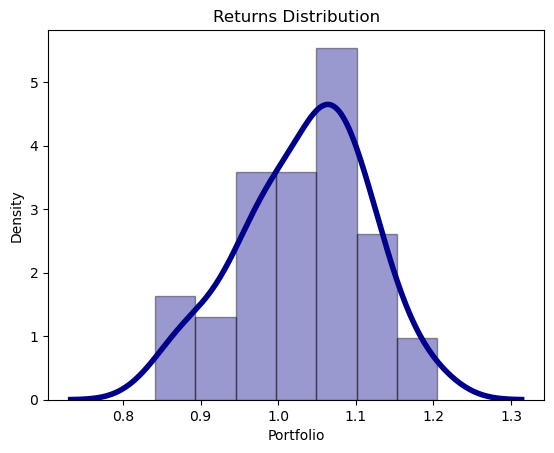

In [34]:
# Density Plot and Histogram

sns.distplot(returns['Portfolio'], hist=True, kde=True, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Returns Distribution')

### Section 2. Finding the Average portfolio returns for 2021 Year

In [35]:
start = datetime.date(2020, 12, 31)
end = datetime.date(2022, 1, 1)
ticker=['AAPL','MSFT']
data=web.get_data_yahoo(ticker,start,end)['Adj Close']
data.head()
# Convert to Monthly
prices=data.resample('1M').last()
prices.shape
## Monthly Returns
returns = prices.pct_change()
returns=returns.dropna()
returns.head()
weightAAPL = initialAAPL / (initialMSFT + initialAAPL)
weightMSFT= 1 - weightAAPL
print(
    "This would make the weights %.3f and %.3f for AAPL and MSFT respectively"
    % (weightAAPL, weightMSFT)
)
returns["Portfolio"] = (returns.AAPL * weightAAPL) + (returns.MSFT * weightMSFT)
returns = returns + 1
returns.head()


This would make the weights 0.900 and 0.100 for AAPL and MSFT respectively


Symbols,AAPL,MSFT,Portfolio
Date,,,
2021-01-31,0.994498,1.042892,0.999327
2021-02-28,0.920288,1.004118,0.928653
2021-03-31,1.007340,1.014588,1.008063
2021-04-30,1.076218,1.069602,1.075558
2021-05-31,0.949503,0.992373,0.953781


In [36]:
Average_portfolio_returns_yr21=returns['Portfolio'].mean()
Average_portfolio_returns_yr21

1.0280588058028322